# Sentiment Analysis
## 1. EDA

In [1]:
# import libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading review file
reviews = pd.read_csv('./dataset/sample30.csv')
print('Shape: ', reviews.shape)
reviews.head(2)

Shape:  (30000, 15)


,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive


In [3]:
reviews.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

## Extracting required columns
As we don't require all columns, So we'll extract only required columns.reviews_text will better choice than Reviews_title.

In [4]:
df_reviews = reviews[['id','reviews_rating', 'reviews_text','reviews_username','user_sentiment']]
print('Shape: ', df_reviews.shape)
df_reviews.head(20)

Shape:  (30000, 5)


,id,reviews_rating,reviews_text,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,5,i love this album. it's very good. more to the...,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,5,Good flavor. This review was collected as part...,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,5,Good flavor.,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,1,I read through the reviews on here before look...,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,1,My husband bought this gel for us. The gel cau...,walker557,Negative
5,AV16khLE-jtxr-f38VFn,1,My boyfriend and I bought this to spice things...,samantha,Negative
6,AV16khLE-jtxr-f38VFn,1,Bought this earlier today and was excited to c...,raeanne,Negative
7,AV16khLE-jtxr-f38VFn,1,I bought this product for my husband and I to ...,kimmie,Negative
8,AV16khLE-jtxr-f38VFn,1,My husband and I bought this for some extra fu...,cassie,Negative
9,AV16khLE-jtxr-f38VFn,1,Got as a surprise for my husband there is noth...,moore222,Positive


# 2. Data cleaning
### Null value Check

Treat the null values

In [5]:
df_reviews.isnull().sum()

id                   0
reviews_rating       0
reviews_text         0
reviews_username    63
user_sentiment       1
dtype: int64

In [6]:
# We have sufficent data and reviews_username is important field, so we can drop null data
df_reviews = df_reviews[~df_reviews.user_sentiment.isnull()]
df_reviews = df_reviews[~df_reviews.reviews_username.isnull()]
print('Shape:', df_reviews.shape)
df_reviews.isnull().sum()

Shape: (29936, 5)


id                  0
reviews_rating      0
reviews_text        0
reviews_username    0
user_sentiment      0
dtype: int64

We have clean data now. Lets evaluate user_sentiment and reviews_rating. Ideally these should be same.

In [7]:
df_reviews['user_sentiment_drived'] = list(map(lambda rating: 'Positive' if rating>2 else 'Negative', df_reviews.reviews_rating))
df_reviews.head(20)

,id,reviews_rating,reviews_text,reviews_username,user_sentiment,user_sentiment_drived
0,AV13O1A8GV-KLJ3akUyj,5,i love this album. it's very good. more to the...,joshua,Positive,Positive
1,AV14LG0R-jtxr-f38QfS,5,Good flavor. This review was collected as part...,dorothy w,Positive,Positive
2,AV14LG0R-jtxr-f38QfS,5,Good flavor.,dorothy w,Positive,Positive
3,AV16khLE-jtxr-f38VFn,1,I read through the reviews on here before look...,rebecca,Negative,Negative
4,AV16khLE-jtxr-f38VFn,1,My husband bought this gel for us. The gel cau...,walker557,Negative,Negative
5,AV16khLE-jtxr-f38VFn,1,My boyfriend and I bought this to spice things...,samantha,Negative,Negative
6,AV16khLE-jtxr-f38VFn,1,Bought this earlier today and was excited to c...,raeanne,Negative,Negative
7,AV16khLE-jtxr-f38VFn,1,I bought this product for my husband and I to ...,kimmie,Negative,Negative
8,AV16khLE-jtxr-f38VFn,1,My husband and I bought this for some extra fu...,cassie,Negative,Negative
9,AV16khLE-jtxr-f38VFn,1,Got as a surprise for my husband there is noth...,moore222,Positive,Negative


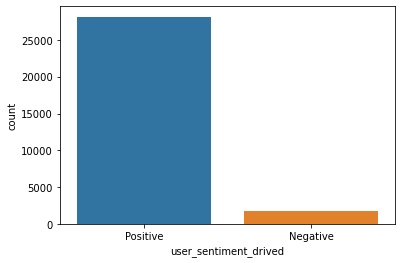

In [8]:
#plotting application data distribution
sns.countplot(x='user_sentiment_drived', data= df_reviews)
plt.show()

In [9]:
df_reviews.user_sentiment_drived.value_counts()

Positive    28145
Negative     1791
Name: user_sentiment_drived, dtype: int64

In [10]:
def checkEqual(review):
    if review['user_sentiment'] == review['user_sentiment_drived']:
        return 0
    return 1
df_reviews['user_segment_unequal'] = df_reviews.apply(checkEqual, axis=1)
df_reviews[df_reviews['user_segment_unequal'] == 1].head(10)

,id,reviews_rating,reviews_text,reviews_username,user_sentiment,user_sentiment_drived,user_segment_unequal
9,AV16khLE-jtxr-f38VFn,1,Got as a surprise for my husband there is noth...,moore222,Positive,Negative,1
11,AV16khLE-jtxr-f38VFn,1,Purchased this thinking it would have some sor...,bre234,Positive,Negative,1
14,AV16khLE-jtxr-f38VFn,1,First time purchase of this type of product. M...,nicole,Positive,Negative,1
19,AV16khLE-jtxr-f38VFn,3,It was my first time using k-y. It didn't do a...,browns fan,Negative,Positive,1
42,AV1h6Gu0glJLPUi8IjA_,3,You would think it's convenient to have bubble...,gardenbunny318,Negative,Positive,1
54,AV1l8zRZvKc47QAVhnAv,1,I used (and loved) this product for several ye...,alnscoob97,Positive,Negative,1
56,AV1l8zRZvKc47QAVhnAv,1,I am so disappointed! I have used this product...,jacmary,Positive,Negative,1
58,AV1l8zRZvKc47QAVhnAv,1,It took me so long to find a moisturizer that ...,kayc,Positive,Negative,1
60,AV1l8zRZvKc47QAVhnAv,1,Olay don't work for me I have overly dry skin....,piggyboy420,Positive,Negative,1
64,AV1l8zRZvKc47QAVhnAv,2,While this product probably does leave faces f...,jharris20,Positive,Negative,1


#### As per observation the provided user_sentiment is not showing correct sentiment but rating shows more accurate. So we have created user_sentiment_drived for sentiment from rating and will go with it.
Dropping extra two columns.

In [11]:
df_reviews = df_reviews.drop(['user_sentiment', 'user_segment_unequal'], axis=1)

In [12]:
print('Shape: ', df_reviews.shape)
df_reviews.head()

Shape:  (29936, 5)


,id,reviews_rating,reviews_text,reviews_username,user_sentiment_drived
0,AV13O1A8GV-KLJ3akUyj,5,i love this album. it's very good. more to the...,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,5,Good flavor. This review was collected as part...,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,5,Good flavor.,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,1,I read through the reviews on here before look...,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,1,My husband bought this gel for us. The gel cau...,walker557,Negative


We have clean table and can perform NLP on it

# 3. Text preprocessing
### NLP

In [13]:
# NLTK libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BA06878\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BA06878\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\BA06878\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BA06878\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
#converting into string
df_reviews['reviews_text'] = df_reviews['reviews_text'].astype('str')

In [15]:
# Remove punctuation 
df_reviews['reviews_text'] = df_reviews['reviews_text'].str.replace('[^\w\s]','')

In [16]:
# Remove Stopwords
stop = stopwords.words('english')
df_reviews['reviews_text'] = df_reviews['reviews_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [17]:
# Converted to lower case
df_reviews['reviews_text'] = df_reviews['reviews_text'].str.lower()

In [18]:
### import necessary libraries
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [19]:
# Lennatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    tokens = word_tokenize(text)
    lemmatized = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join([str(elem) for elem in lemmatized])


In [20]:
df_reviews.head()

,id,reviews_rating,reviews_text,reviews_username,user_sentiment_drived
0,AV13O1A8GV-KLJ3akUyj,5,love album good hip hop side current pop sound...,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,5,good flavor this review collected part promotion,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,5,good flavor,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,1,i read reviews looking buying one couples lubr...,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,1,my husband bought gel us the gel caused irrita...,walker557,Negative


In [21]:
df_reviews['reviews_text_lem'] = df_reviews.reviews_text.map(lemmatizer)
df_reviews.head()

,id,reviews_rating,reviews_text,reviews_username,user_sentiment_drived,reviews_text_lem
0,AV13O1A8GV-KLJ3akUyj,5,love album good hip hop side current pop sound...,joshua,Positive,love album good hip hop side current pop sound...
1,AV14LG0R-jtxr-f38QfS,5,good flavor this review collected part promotion,dorothy w,Positive,good flavor this review collected part promotion
2,AV14LG0R-jtxr-f38QfS,5,good flavor,dorothy w,Positive,good flavor
3,AV16khLE-jtxr-f38VFn,1,i read reviews looking buying one couples lubr...,rebecca,Negative,i read review looking buying one couple lubric...
4,AV16khLE-jtxr-f38VFn,1,my husband bought gel us the gel caused irrita...,walker557,Negative,my husband bought gel u the gel caused irritat...


# 3. Feature Extraction

In [22]:
#Modelling 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
x=df_reviews['reviews_text_lem'] 
y=df_reviews['user_sentiment_drived']

In [25]:
# Split the dataset into test and train
seed = 50 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

In [26]:
word_vectorizer = TfidfVectorizer(
    strip_accents='unicode',    # Remove accents and perform other character normalization during the preprocessing step. 
    analyzer='word',            # Whether the feature should be made of word or character n-grams.
    token_pattern=r'\w{1,}',    # Regular expression denoting what constitutes a “token”, only used if analyzer == 'word'
    ngram_range=(1, 3),         # The lower and upper boundary of the range of n-values for different n-grams to be extracted
    stop_words='english',
    sublinear_tf=True)

word_vectorizer.fit(X_train)    # Fiting it on Train
train_word_features = word_vectorizer.transform(X_train)  # Transform on Train

In [27]:
## transforming the train and test datasets
X_train_transformed = word_vectorizer.transform(X_train.tolist())
X_test_transformed = word_vectorizer.transform(X_test.tolist())

# # Print the shape of each dataset.
print('X_train_transformed', X_train_transformed.shape)
print('y_train', y_train.shape)
print('X_test_transformed', X_test_transformed.shape)
print('y_test', y_test.shape)

X_train_transformed (20955, 372947)
y_train (20955,)
X_test_transformed (8981, 372947)
y_test (8981,)


# Model Building

## Logistic regression

In [28]:
logit = LogisticRegression()
logit.fit(X_train_transformed,y_train)

LogisticRegression()

In [29]:
# Prediction Train Data
y_pred_train= logit.predict(X_train_transformed)

#Model Performance on Train Dataset
print("Logistic Regression accuracy", accuracy_score(y_pred_train, y_train))
print(classification_report(y_pred_train, y_train))

Logistic Regression accuracy 0.9644476258649487
              precision    recall  f1-score   support

    Negative       0.41      0.99      0.58       513
    Positive       1.00      0.96      0.98     20442

    accuracy                           0.96     20955
   macro avg       0.70      0.98      0.78     20955
weighted avg       0.99      0.96      0.97     20955



In [30]:
# Prediction Test Data
y_pred_test = logit.predict(X_test_transformed)

#Model Performance on Test Dataset
print("Logistic Regression accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))

Logistic Regression accuracy 0.9630330698140519
              precision    recall  f1-score   support

    Negative       0.41      0.97      0.57       229
    Positive       1.00      0.96      0.98      8752

    accuracy                           0.96      8981
   macro avg       0.70      0.97      0.78      8981
weighted avg       0.98      0.96      0.97      8981



In [31]:
from collections import Counter

In [32]:
counter = Counter(y_train)
print('Before',counter)

sm = SMOTE()

# transform the dataset
X_train_transformed_sm, y_train_sm = sm.fit_resample(X_train_transformed, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({'Positive': 19711, 'Negative': 1244})
After Counter({'Positive': 19711, 'Negative': 19711})


In [33]:
logit_sm = LogisticRegression()
logit_sm.fit(X_train_transformed_sm,y_train_sm)

LogisticRegression()

In [34]:
# Prediction Train Data
y_pred_train_sm= logit_sm.predict(X_train_transformed_sm)

#Model Performance on Train Dataset
print("Logistic Regression accuracy", accuracy_score(y_pred_train_sm, y_train_sm))
print(classification_report(y_pred_train_sm, y_train_sm))

Logistic Regression accuracy 0.9971335802343869
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00     19792
    Positive       1.00      1.00      1.00     19630

    accuracy                           1.00     39422
   macro avg       1.00      1.00      1.00     39422
weighted avg       1.00      1.00      1.00     39422



In [35]:
# Prediction Test Data
y_pred_test = logit_sm.predict(X_test_transformed)

print("Logistic Regression accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))
print(confusion_matrix(y_pred_test, y_test))

Logistic Regression accuracy 0.9589132613294733
              precision    recall  f1-score   support

    Negative       0.76      0.64      0.69       650
    Positive       0.97      0.98      0.98      8331

    accuracy                           0.96      8981
   macro avg       0.86      0.81      0.83      8981
weighted avg       0.96      0.96      0.96      8981

[[ 414  236]
 [ 133 8198]]


## Random Forest

In [36]:
classifier = RandomForestClassifier(n_estimators=100, random_state=seed, n_jobs=-1)
classifier.fit(X_train_transformed_sm,y_train_sm)

RandomForestClassifier(n_jobs=-1, random_state=50)

In [37]:
# Prediction Train Data
y_pred_train_sm= classifier.predict(X_train_transformed_sm)

print("Random Forest Model accuracy", accuracy_score(y_pred_train_sm, y_train_sm))
print(classification_report(y_pred_train_sm, y_train_sm))

Random Forest Model accuracy 0.9999746334534017
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00     19710
    Positive       1.00      1.00      1.00     19712

    accuracy                           1.00     39422
   macro avg       1.00      1.00      1.00     39422
weighted avg       1.00      1.00      1.00     39422



In [38]:
# Prediction Test Data
y_pred_test = classifier.predict(X_test_transformed)

print("Random Forest Model accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))
print(confusion_matrix(y_pred_test, y_test))

Random Forest Model accuracy 0.9677096091749249
              precision    recall  f1-score   support

    Negative       0.47      0.99      0.64       261
    Positive       1.00      0.97      0.98      8720

    accuracy                           0.97      8981
   macro avg       0.74      0.98      0.81      8981
weighted avg       0.98      0.97      0.97      8981

[[ 259    2]
 [ 288 8432]]


# XGBoost

In [39]:
from xgboost import XGBClassifier

In [40]:
classifier = RandomForestClassifier(n_estimators=100, random_state=seed, n_jobs=-1)

In [41]:
xgbc = XGBClassifier(n_estimators=100, random_state=seed, n_jobs=-1) 

In [49]:
xgbc.fit(X_train_transformed_sm,y_train_sm)

[15:24:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=50,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
# Prediction Train Data
y_pred_train_sm= xgbc.predict(X_train_transformed_sm)

print("XGBoost Model accuracy", accuracy_score(y_pred_train_sm, y_train_sm))
print(classification_report(y_pred_train_sm, y_train_sm))

XGBoost Model accuracy 0.9885343209375476
              precision    recall  f1-score   support

    Negative       0.98      0.99      0.99     19465
    Positive       0.99      0.98      0.99     19957

    accuracy                           0.99     39422
   macro avg       0.99      0.99      0.99     39422
weighted avg       0.99      0.99      0.99     39422



In [51]:
# Prediction Test Data
y_pred_test = xgbc.predict(X_test_transformed)

print("XGBoost Model accuracy", accuracy_score(y_pred_test, y_test))
print(classification_report(y_pred_test, y_test))
print(confusion_matrix(y_pred_test, y_test))

XGBoost Model accuracy 0.967598262999666
              precision    recall  f1-score   support

    Negative       0.54      0.88      0.67       336
    Positive       1.00      0.97      0.98      8645

    accuracy                           0.97      8981
   macro avg       0.77      0.93      0.83      8981
weighted avg       0.98      0.97      0.97      8981

[[ 296   40]
 [ 251 8394]]


# Sentiment analysis summary

Test data Accuracy
    
-		Logistic Regression accuracy 0.9630330698140
-		Random Forest Model accuracy 0.9677096091749249
-		XGBoost Model accuracy 0.967598262999666

Accuracy is very close in all three model. Random Forest is winner with very close margin. So we'll use Random Rorest